In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [2]:
# Physics
lx = 10.0
lam = 1.0
rhocp = 1.0

In [3]:
# Numerics
nx = 100
nt = 5000
cfl = 1.0

In [4]:
# Preprocessing
x = np.linspace(0, lx, nx)
dx = lx / (nx - 1)

dt = 0.5 * cfl * dx**2 * rhocp / lam

In [5]:
# Initial Contitions
T0 = 1.0
T = T0 * np.sin(np.pi * x / lx)
qx = np.zeros(nx - 1)
t = 0.0

In [6]:
def analytic(x, t):
    return np.sin(np.pi * x / lx) * np.exp( - (lam / rhocp) * (np.pi/lx)**2 * t)

Text(0.5, 0.98, 'Iteration = 0, T = 0.0000')

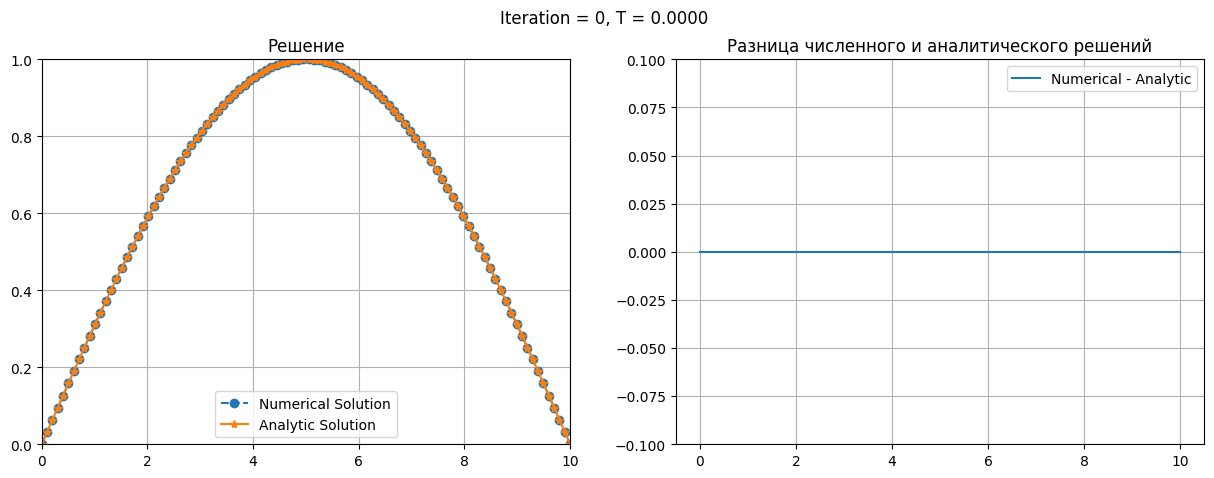

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
gr1, = ax[0].plot(x, T, label="Numerical Solution", linestyle='--', marker='o')
gr2, = ax[0].plot(x, analytic(x, 0), label="Analytic Solution", linestyle='-', marker='*')
ax[0].set_title("Решение")
ax[0].legend()
ax[0].grid()
ax[0].set_ylim(0, T0)
ax[0].set_xlim(x[0], x[-1])

gr3, = ax[1].plot(x, T - analytic(x, 0), label="Numerical - Analytic")
ax[1].set_title("Разница численного и аналитического решений")
ax[1].legend()
ax[1].grid()
ax[1].set_ylim(-1e-1, 1e-1)
fig.suptitle("Iteration = {:}, T = {:.4f}".format(0, t))

In [8]:
def loop(i):
    global T, t
    qx[:] = -lam * np.diff(T) / dx
    T[1:-1] = T[1:-1] - dt * np.diff(qx) / dx / rhocp
    t = t + dt
    gr1.set_ydata(T)
    gr2.set_ydata(analytic(x, t))
    gr3.set_ydata(T - analytic(x, t))
    fig.suptitle("Iteration = {:}, T = {:.4f}".format(i, t))
    return 

In [9]:
ani = animation.FuncAnimation(fig, loop, nt, interval = 1, repeat = False)

In [10]:
ani.save("heat1d_with_analytic.mp4", fps = 10)